#  Vortex sheet roll up using point vortices

In [70]:
import numpy as np
import math
import matplotlib.pyplot as plt 
import numba


def get_velocity(circulation, self_position, other_position):       #velocity due to point vortices
    v_conjugate = complex(0,-1)*(circulation)/(2*(np.pi)*(self_position-other_position))
    velocity  = v_conjugate.conjugate()
    return velocity

def total_velocity(gamma, all_positions):                          #velocity of all vortices due to others
    v=np.zeros(len(gamma),dtype=complex)
    for i in range(len(gamma)):
        for j in range(len(gamma)):
            if i!=j:
                v[i] += get_velocity(gamma[j],all_positions[i],all_positions[j])
    return v

def euler(gamma, all_positions, dt):                            #euler function for position update
    new_positions = np.zeros(shape=(len(gamma)),dtype=complex)
    velocity = total_velocity(gamma, all_positions)
    for i in range(len(gamma)):
        new_positions[i] = all_positions[i] + velocity[i]*dt
    return new_positions

def RK2(gamma, all_positions, dt):                              #RK2 for position update
    new_positions = np.zeros(shape=(len(gamma)),dtype=complex)
    vi = total_velocity(gamma, all_positions)
    temp_positions = euler(gamma, all_positions, dt)
    vi1 = total_velocity(gamma, temp_positions)
    for i in range(len(gamma)):
        new_positions[i] = all_positions[i] + (vi[i]+vi1[i])*dt/2
    return new_positions


def integrate(gamma, all_positions, n, dt, method):             #integrater for RK2 And Euler 
                                                                #merthod =1 for RK2 AND 2 for Euler
    data = []                                                   #gamma and all_positions are vorticity and 
                                                                #positions of all point vortices
    data.append(all_positions)                                  #dt is time step, n = number of steps
    temp_positions = all_positions
    if method==1 :
        for i in range(1,n,1):
            new_positions = RK2(gamma,temp_positions, dt)
            data.append(new_positions)
            temp_positions = new_positions

    elif method==2 :
        for i in range(1,n,1):
            new_positions = euler(gamma,temp_positions, dt)
            data.append(new_positions)
            #for q in range(len(gamma)):
                #data[q][i]=new_positions[q]
            temp_positions = new_positions
    return data

def rollup_vortices(number, steps, dt, method):              #number= total point vortices, steps are no. of steps
    def circulation(y,dx):                                   #dt is time step , method are same as above
        return 4*y*dx/np.sqrt(1-4*(y**2))
    dx = 1/number
    x = np.linspace(-0.5+dx/2,0.5-dx/2,number)
    y = np.zeros(number)
    z= x + 1j*y
    gamma = np.array([])
    for i in range(number):
        gamma = np.append(gamma,circulation(x[i],dx))
    data = integrate(gamma, z, steps, dt, method)
    show_rollup(data, gamma)
    return data
def show_rollup(data, gamma):                               #for ploting the data
    plt.figure(figsize=(5,5))
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    for i in range(len(gamma)):
        plt.plot(data[0:len(gamma)][-1].real,data[0:len(gamma)][-1].imag, "b")

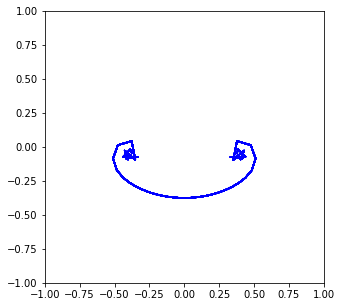

In [71]:
data = []
data = rollup_vortices(50,5000,0.01,1)

# Using Krasny Blob

In [9]:
import numpy as np
import math
import matplotlib.pyplot as plt 
import numba


    
def show_rollup(data,gamma):
    plt.figure(figsize=(5,5))
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    for i in range(len(gamma)):
        plt.plot(data[0:len(gamma)][-1].real,data[0:len(gamma)][-1].imag)
    


def velocity_krasny(circulation, self_position, other_position, delta):
    z_relative = (self_position - other_position)
    x = z_relative.real
    y = z_relative.imag
    velocity = complex(-y,x)*circulation/(2*np.pi*(x*x+y*y+delta*delta))
    return velocity

def total_velocity_krasny(gamma, all_positions,delta): 
    v=np.zeros(len(gamma),dtype=complex)
    for i in range(len(gamma)):
        for j in range(len(gamma)):
            if i !=j :
                v[i] += velocity_krasny(gamma[j],all_positions[i],all_positions[j],delta)
    return v
def euler_krasny(gamma, all_positions, dt, delta):
    new_positions = np.zeros(shape=(len(gamma)),dtype=complex)
    velocity = total_velocity_krasny(gamma, all_positions,delta)
    velocity
    for i in range(len(gamma)):
        new_positions[i] = all_positions[i] + velocity[i]*dt
    return new_positions


def RK2_krasny(gamma, all_positions, dt, delta):
    new_positions = np.zeros(shape=(len(gamma)),dtype=complex)
    vi = total_velocity_krasny(gamma, all_positions,delta)
    temp_positions = euler_krasny(gamma, all_positions, dt,delta)
    vi1 = total_velocity_krasny(gamma, temp_positions,delta)
    for i in range(len(gamma)):
        new_positions[i] = all_positions[i] + (vi[i]+vi1[i])*dt/2
    return new_positions

def integrate_krasny(gamma, all_positions, n, dt, method, delta):
    
    data = []
    data.append(all_positions)
    temp_positions = all_positions
    if method == 1 :
        for i in range(1,n,1):
            new_positions = RK2_krasny(gamma,temp_positions, dt,delta)
             #print(new_positions)
            data.append(new_positions)
            temp_positions = new_positions

    elif method == 2 :
        for i in range(1,n,1):
            new_positions = euler_krasny(gamma,temp_positions, dt, delta)
            #print(new_positions)
            data.append(new_positions)
            #for q in range(len(gamma)):
                #data[q][i]=new_positions[q]
            temp_positions = new_positions
    return data        
    
def rollup_krasny(number, steps, dt, method, delf=3):           #function takes four args:1. number of blobs, number
    def circulation(y,dx):                                      #number of steps, dt=timestep, delf=delta factor
        return 4*y*dx/np.sqrt(1-4*(y**2))
    dx = 1/number
    x = np.linspace(-0.5+dx/2,0.5-dx/2,number) 
    y = np.zeros(number)
    z= x + 1j*y
    gamma = np.array([])
    for i in range(number):
        gamma = np.append(gamma,circulation(x[i],dx))
    delta = delf*dx
    data = integrate_krasny(gamma, z, steps, dt, method, delta)
    show_rollup(data,gamma)
    return data





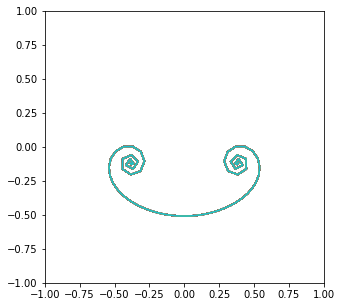

In [10]:
data = []
data = rollup_krasny(80, 5000, 0.01, 1, delf=4)

# Blob at position bsin(theta)

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt 
import numba



def show_rollup(data,gamma):
    plt.figure(figsize=(5,5))
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    for i in range(len(gamma)):
        plt.plot(data[0:len(gamma)][-1].real,data[0:len(gamma)][-1].imag)
    


def velocity_krasny(circulation, self_position, other_position, delta):
    z_relative = (self_position - other_position)
    x = z_relative.real
    y = z_relative.imag
    velocity = complex(-y,x)*circulation/(2*np.pi*(x*x+y*y+delta*delta))
    return velocity

def total_velocity_krasny(gamma, all_positions,delta): 
    v=np.zeros(len(gamma),dtype=complex)
    for i in range(len(gamma)):
        for j in range(len(gamma)):
            if i !=j :
                v[i] += velocity_krasny(gamma[j],all_positions[i],all_positions[j],delta)
    return v
def euler_krasny(gamma, all_positions, dt, delta):
    new_positions = np.zeros(shape=(len(gamma)),dtype=complex)
    velocity = total_velocity_krasny(gamma, all_positions,delta)
    for i in range(len(gamma)):
        new_positions[i] = all_positions[i] + velocity[i]*dt
    return new_positions


def RK2_krasny(gamma, all_positions, dt, delta):
    new_positions = np.zeros(shape=(len(gamma)),dtype=complex)
    vi = total_velocity_krasny(gamma, all_positions,delta)
    temp_positions = euler_krasny(gamma, all_positions, dt,delta)
    vi1 = total_velocity_krasny(gamma, temp_positions,delta)
    for i in range(len(gamma)):
        new_positions[i] = all_positions[i] + (vi[i]+vi1[i])*dt/2
    return new_positions

def integrate_krasny(gamma, all_positions, n, dt, method, delta):
    
    data = []
    data.append(all_positions)
    temp_positions = all_positions
    if method == 1 :
        for i in range(1,n,1):
            new_positions = RK2_krasny(gamma,temp_positions, dt,delta)
             #print(new_positions)
            data.append(new_positions)
            temp_positions = new_positions

    elif method == 2 :
        for i in range(1,n,1):
            new_positions = euler_krasny(gamma,temp_positions, dt, delta)
            #print(new_positions)
            data.append(new_positions)
            #for q in range(len(gamma)):
                #data[q][i]=new_positions[q]
            temp_positions = new_positions
    return data        
    
def rollup_krasny_bsin(number, steps, dt, method, delf=3):
    def circulation(y,dx):
        return 4*y*dx/np.sqrt(1-4*(y**2))
    dx = 1/number
    x = np.linspace(-0.5+dx/2,0.5-dx/2,number)
    x1=np.zeros(number)
    for i in range(number):
        x1[i] = np.sin(x[i])
    y = np.zeros(number)
    z= x1 + 1j*y
    gamma = np.array([])
    for i in range(number):
        gamma = np.append(gamma,circulation(x[i],dx))

    delta = delf*dx
    data = integrate_krasny(gamma, z, steps, dt, method, delta)
    show_rollup(data,gamma)
    return data





[-0.14035848 -0.07980094 -0.0608487  -0.05060405 -0.04389686 -0.03903847
 -0.03529042 -0.03227137 -0.02976172 -0.02762479 -0.02577039 -0.02413627
 -0.02267787 -0.0213623  -0.02016468 -0.01906579 -0.01805051 -0.01710674
 -0.01622467 -0.01539624 -0.01461475 -0.01387461 -0.01317106 -0.01250003
 -0.01185806 -0.01124211 -0.01064955 -0.01007807 -0.00952561 -0.00899039
 -0.00847076 -0.00796528 -0.00747265 -0.00699167 -0.00652126 -0.00606044
 -0.00560829 -0.00516398 -0.00472672 -0.00429579 -0.0038705  -0.00345022
 -0.00303433 -0.00262225 -0.00221343 -0.00180733 -0.00140344 -0.00100125
 -0.00060027 -0.00020001  0.00020001  0.00060027  0.00100125  0.00140344
  0.00180733  0.00221343  0.00262225  0.00303433  0.00345022  0.0038705
  0.00429579  0.00472672  0.00516398  0.00560829  0.00606044  0.00652126
  0.00699167  0.00747265  0.00796528  0.00847076  0.00899039  0.00952561
  0.01007807  0.01064955  0.01124211  0.01185806  0.01250003  0.01317106
  0.01387461  0.01461475  0.01539624  0.01622467  0.

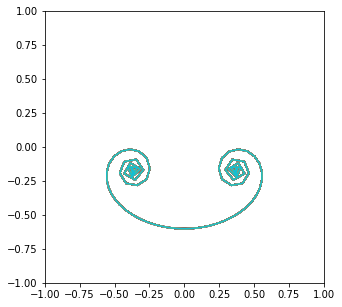

In [5]:
data = []
data = rollup_krasny_bsin(100, 1000, 0.01, 1, delf=4)